In [ ]:
import pandas as pd
from google.colab import drive

#Loading the data into the drive 
drive.mount('/drive')
dataSet = pd.read_csv('/drive/MyDrive/data.csv')

# Showing basic statistical description of the data using the description() function
print(dataSet.describe())


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [ ]:
# Checking if the data has null values or not 
dataSet.isnull().any()

Duration    False
Pulse       False
Calories    False
dtype: bool

In [ ]:
# 3.a)Replacing the null values with the mean function 
dataSet.fillna(dataSet.mean(), inplace=True)
dataSet.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [ ]:
# Aggregating the data using min, max, count, and mean from data set 
agg_dataSet = dataSet[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])
print(agg_dataSet)

         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [ ]:
# Filtering the dataframe to select rows with calories between 500 and 1000

filtered_dataSet = dataSet[(dataSet['Calories'] >= 500) & (dataSet['Calories'] <= 1000)]
print(filtered_dataSet)

     Duration  Pulse  Calories
51         80    123       643
62        160    109       853
65        180     90       800
66        150    105       873
67        150    107       816
72         90    100       700
73        150     97       953
75         90     98       563
78        120    100       500
83        120    100       500
87        120    100      1000
90        180    101       600
99         90     93       604
101        90     90       500
102        90     90       500
103        90     90       500
106       180     90       800
108        90     90       500


In [ ]:
# Filtering the dataframe to select rows with calories > 500 and pulse < 100
filtered_dataSet2 = dataSet[(dataSet['Calories'] > 500) & (dataSet['Pulse'] < 100)]
print(filtered_dataSet2)

     Duration  Pulse  Calories
65        180     90       800
70        150     97      1115
73        150     97       953
75         90     98       563
99         90     93       604
106       180     90       800


In [ ]:
# Creating a new df_modified dataframe without Maxpulse column
dataSet_modified = dataSet.drop(columns=['Maxpulse'])

# Printing  the created new dataframe 
print(dataSet_modified)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [ ]:
# Deleting Maxpulse column from the main dataframe
dataSet.drop(columns=['Maxpulse'], inplace=True)
print(dataSet)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [ ]:
# Converting datatype of Calories column to int
dataSet['Calories'] = dataSet['Calories'].astype(int)
dataSet.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Duration', ylabel='Calories'>

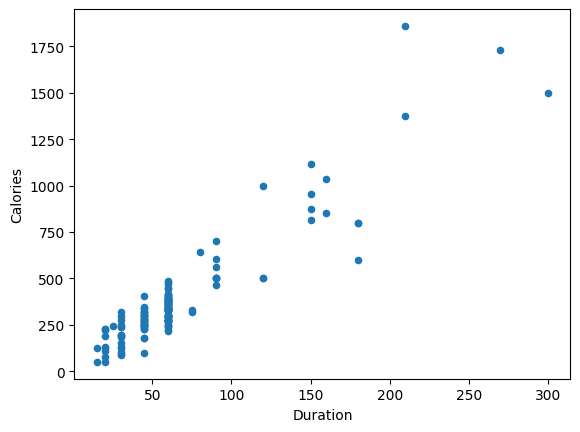

In [ ]:
# Creating scatter plot of Duration and Calories columns
dataSet.plot.scatter(x='Duration', y='Calories')

In [ ]:
#Glass DataSet Classifier 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load the glass dataset using pandas
glass = pd.read_csv("/drive/MyDrive/glass.csv")

# Extract the features and target variable
X = glass.drop("Type", axis=1).values
y = glass["Type"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Create a Gaussian Naive Bayes classifier
clf_nb = GaussianNB()

# Train the classifier on the training data
clf_nb.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred_nb = clf_nb.predict(X_test)

# Evaluate the classifier's performance on the testing data
score_nb = clf_nb.score(X_test, y_test)
print("Naive Bayes Accuracy:", score_nb)

report_nb = classification_report(y_test, y_pred_nb)
print(report_nb)


Naive Bayes Accuracy: 0.20930232558139536
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.57      0.18      0.28        22
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.83      1.00      0.91         5

    accuracy                           0.21        43
   macro avg       0.23      0.20      0.20        43
weighted avg       0.39      0.21      0.25        43



In [ ]:

# Create a linear SVM classifier
clf_svm = LinearSVC()

# Train the classifier on the training data
clf_svm.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred_svm = clf_svm.predict(X_test)

# Evaluate the classifier's performance on the testing data
score_svm = clf_svm.score(X_test, y_test)
print("Linear SVM Accuracy:", score_svm)

report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)

Linear SVM Accuracy: 0.13953488372093023
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        22
           3       0.08      1.00      0.15         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.75      0.60      0.67         5

    accuracy                           0.14        43
   macro avg       0.14      0.27      0.14        43
weighted avg       0.09      0.14      0.09        43



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [ ]:
#Implement linear SVM method using scikit library 
#a. Use the glass dataset available in Link also provided in your assignment. b. Use train_test_split to create training and testing part. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Linear SVM classifier
model = SVC(kernel='linear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Print the classification report
classification_report_result = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(classification_report_result)


In [ ]:
#visualizations to describe or show correlations in the Glass Dataset. 
# Plotting correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

# Plotting scatter plot of two variables
sns.scatterplot(x="Al", y="RI", data=data)
plt.title("Scatter Plot: Al vs RI")
plt.xlabel("Al")
plt.ylabel("RI")
plt.show()


<Axes: >

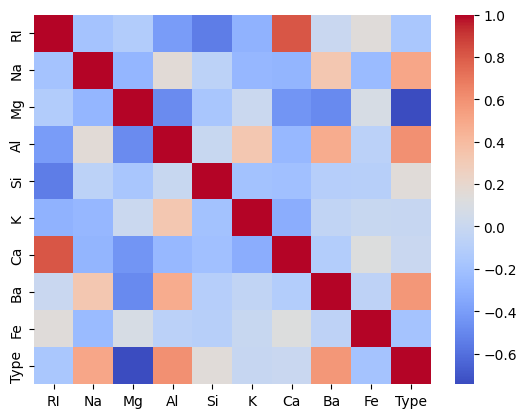

In [ ]:
# Do at least two visualizations to describe or show correlations in the Glass Dataset. 
correlation_data = glass.corr()
sns.heatmap(correlation_data,cmap='coolwarm')

In [ ]:
 #visualization 2
 glass.corr().style.background_gradient(cmap="Greens_r")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000
